In [34]:
import nltk

import numpy as np
import pandas as pd
import string
import nltk
import itertools
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)
import seaborn as sns


In [26]:
spam_dataset = pd.read_csv('spam.csv', encoding = "ISO-8859-1", usecols=[0, 1], names=['Spam', 'Text'],
                           skiprows=1)
spam_dataset['Spam'] = spam_dataset['Spam'].replace(['ham', 'spam'], [0, 1])
spam_dataset

print(spam_dataset['Spam'].value_counts(normalize=True))

Spam
0    0.865937
1    0.134063
Name: proportion, dtype: float64


C:\Users\kkleps\AppData\Local\Temp\ipykernel_27784\3215714144.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  spam_dataset['Spam'] = spam_dataset['Spam'].replace(['ham', 'spam'], [0, 1])


Usuwannie znaków interpunkcyjnych

In [27]:

def remove_punctuation(text):
    cleaned = ''.join([char for char in text if char not in string.punctuation])
    return cleaned

spam_dataset['Cleaned_Text'] = spam_dataset['Text'].apply(lambda x: remove_punctuation(x))
spam_dataset


,Spam,Text,Cleaned_Text
0,0,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...
1,0,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,0,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?,Will Ì b going to esplanade fr home
5569,0,"Pity, * was in mood for that. So...any other s...",Pity was in mood for that Soany other suggest...
5570,0,The guy did some bitching but I acted like i'd...,The guy did some bitching but I acted like id ...


Tokenizacja

In [28]:
nltk.download('punkt')          #KLUCZOWE - trzeba pobrać

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kkleps\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
def tokenize(text):

    # Usunięcie wielkich liter
    clean_text = text.lower()

    # Tokenizacja
    tokenized_text = nltk.word_tokenize(clean_text)
    return tokenized_text

spam_dataset['Tokenized_Text'] = spam_dataset['Cleaned_Text'].apply(lambda x: tokenize(x))
spam_dataset

,Spam,Text,Cleaned_Text,Tokenized_Text
0,0,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o..."
1,0,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,0,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t..."
4,0,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,This is the 2nd time we have tried 2 contact u...,"[this, is, the, 2nd, time, we, have, tried, 2,..."
5568,0,Will Ì_ b going to esplanade fr home?,Will Ì b going to esplanade fr home,"[will, ì, b, going, to, esplanade, fr, home]"
5569,0,"Pity, * was in mood for that. So...any other s...",Pity was in mood for that Soany other suggest...,"[pity, was, in, mood, for, that, soany, other,..."
5570,0,The guy did some bitching but I acted like i'd...,The guy did some bitching but I acted like id ...,"[the, guy, did, some, bitching, but, i, acted,..."


Czyszczenie - usuwanie stopwords, stemming i lematyzacja

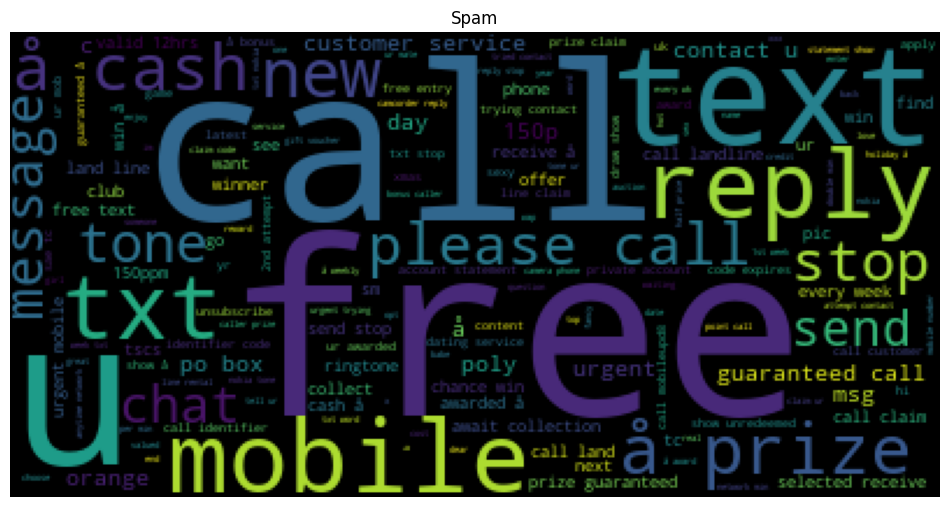

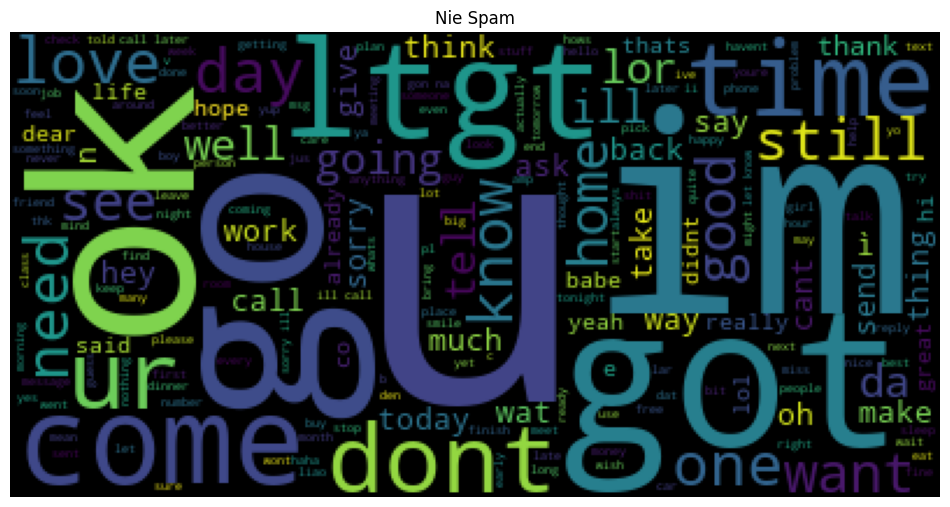

In [30]:
#Usuwanie stepwords
stopwords = nltk.corpus.stopwords.words("english")

def remove_stopwords(text):
    without_stopwords = [word for word in text if word not in stopwords]
    return without_stopwords
spam_dataset['WithoutStop_Text'] = spam_dataset['Tokenized_Text'].apply(lambda x: remove_stopwords(x))
spam_dataset

# Lematyzacja
lemmater = nltk.WordNetLemmatizer()
def lemmatizing(text):
    lemmatized_words = [lemmater.lemmatize(word) for word in text]
    return lemmatized_words
spam_dataset['Lemmatized_Text'] = spam_dataset['WithoutStop_Text'].apply(lambda x: lemmatizing(x))
spam_dataset

words_spam = list(spam_dataset.loc[spam_dataset['Spam']==1, 'Lemmatized_Text'].values)
words_spam = list(itertools.chain.from_iterable(words_spam))
words_spam = ' '.join(words_spam)
words_notspam = list(spam_dataset.loc[spam_dataset['Spam']==0, 'Lemmatized_Text'].values)
words_notspam = list(itertools.chain.from_iterable(words_notspam))
words_notspam = ' '.join(words_notspam)

# Wizualizacja - chmura
wordcloud = WordCloud().generate(words_spam)
plt.figure(figsize = (12, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Spam')
plt.show()

wordcloud = WordCloud().generate(words_notspam)
plt.figure(figsize = (12, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Nie Spam')
plt.show()

Wektoryzacja

In [32]:
# Przygotowanie danych do wektoryzacji: sklejamy lematy z powrotem w tekst
spam_dataset['Text_for_Vector'] = spam_dataset['Lemmatized_Text'].apply(lambda toks: ' '.join(toks))

# WektoryzacjaTF‑IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(spam_dataset['Text_for_Vector'])
y = spam_dataset['Spam']



In [33]:
# Podział na zbiór treningowy i testowy (ze stratyfikacją)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42,stratify=y)

# Pierwszy model Random Forest – zbieramy feature importances
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
feature_names = np.array(vectorizer.get_feature_names_out())

# Selekcja cech: tylko te o ważności > 0.001
mask = importances > 0.001
selected_features = feature_names[mask]
selected_indices = np.where(mask)[0]

print(f"Wybranych cech: {len(selected_features)} z {len(feature_names)}")

# Redukcja macierzy do wyselekcjonowanych cech
X_train_sel = X_train[:, selected_indices]
X_test_sel  = X_test[:,  selected_indices]

# Drugi model z GridSearchCV
param_grid = {'n_estimators': [100, 200],'max_depth':    [None, 10, 20],'min_samples_split': [2, 5]}

rf2 = RandomForestClassifier(random_state=42)
grid = GridSearchCV(
    rf2,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid.fit(X_train_sel, y_train)

# Wyniki
print("Najlepsze hiperparametry:", grid.best_params_)
y_pred = grid.predict(X_test_sel)
print("\nRaport klasyfikacji na zbiorze testowym:")
print(classification_report(y_test, y_pred))

Wybranych cech: 156 z 8843
Najlepsze hiperparametry: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}

Raport klasyfikacji na zbiorze testowym:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.98      0.87      0.92       149

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



Metryki


Accuracy: 0.9794
Precision: 0.9773
Recall: 0.8658
F1-score: 0.9181

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.98      0.87      0.92       149

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Confusion Matrix:
 [[963   3]
 [ 20 129]]


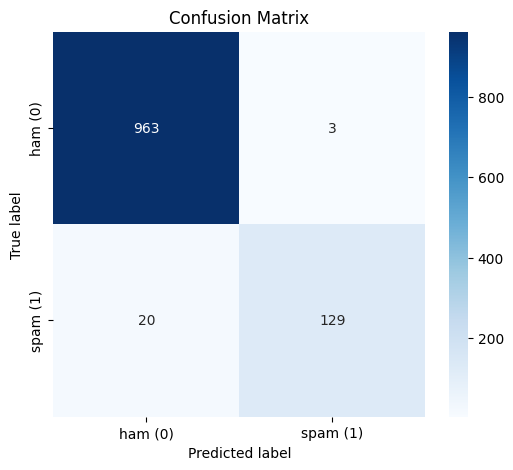

In [ ]:
# Podstawowe metryki
acc  = accuracy_score(y_test,  y_pred)
prec = precision_score(y_test, y_pred)
rec  = recall_score(y_test,    y_pred)
f1   = f1_score(y_test,       y_pred)

print("Accuracy: {:.4f}".format(acc))
print("Precision: {:.4f}".format(prec))
print("Recall: {:.4f}".format(rec))
print("F1-score: {:.4f}".format(f1))

# Szczegółowy raport
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Macierz omyłek
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Wizualizacja macierzy omyłek
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['ham (0)', 'spam (1)'],
            yticklabels=['ham (0)', 'spam (1)'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()